# Basic Set-up stuff

In [ ]:
data <- read.csv("ppm_data_nathan.csv")
summary(data)
print(head(data))

     number           theme            themeGroup          subtheme        
 Min.   :   2174   Length:2227        Length:2227        Length:2227       
 1st Qu.:  31018   Class :character   Class :character   Class :character  
 Median :  60221   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  80997                                                           
 3rd Qu.:  75188                                                           
 Max.   :5005249                                                           
     pieces          minifigs     availability        mean_nzd_new     
 Min.   :   0.0   Min.   : 1.00   Length:2227        Min.   :   1.218  
 1st Qu.:  96.5   1st Qu.: 2.00   Class :character   1st Qu.:  48.341  
 Median : 257.0   Median : 3.00   Mode  :character   Median :  97.836  
 Mean   : 429.6   Mean   : 3.44                      Mean   : 176.997  
 3rd Qu.: 526.5   3rd Qu.: 4.00                      3rd Qu.: 200.858  
 Max.   :6020.0   Max.   :32.00     

  number theme themeGroup         subtheme pieces minifigs availability
1   5552 Duplo Pre-school Thomas & Friends     32        1       Retail
2   5555 Duplo Pre-school Thomas & Friends     18        1       Retail
3   7235  City Modern day           Police     28        1       Retail
4   7236  City Modern day           Police     59        1       Retail
5   7241  City Modern day             Fire     46        1       Retail
6   7243  City Modern day     Construction    298        3       Retail
  mean_nzd_new first_available_int last_available_int time_available
1    271.07078            2007.814           2008.027      0.2136238
2    216.85663            2007.814           2008.025      0.2108915
3     31.21843            2007.814           2012.880      5.0660828
4     61.35235            2007.814           2011.389      3.5753425
5     20.05472            2007.814           2010.997      3.1835616
6    271.07078            2008.186           2008.186      0.0000000
  time_since_

Reading in the data

Libraries

In [ ]:
install.packages("gbm")
install.packages("randomForest")
install.packages("tree")
install.packages("ISLR")
install.packages("rpart")
install.packages("tidyverse")
install.packages("MASS")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(tree)
library(ISLR)
library(rpart)
library(tidyverse)
library(MASS)
library(gbm)
library(randomForest)

In [ ]:
install.packages("crossval")
library(crossval)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Making the new variables

In [ ]:
data$roi_pa <- (((data$mean_nzd_new / data$min_retail_price)^(1/data$time_since_available)) - 1)* 100
summary(data)

     number                        theme                themeGroup 
 Min.   :  10232   City               :260   Licensed        :701  
 1st Qu.:  41380   Star Wars          :231   Modern day      :459  
 Median :  70320   Friends            :199   Action/Adventure:196  
 Mean   :  95109   Marvel Super Heroes:125   Miscellaneous   :121  
 3rd Qu.:  75245   Ninjago            :111   Model making    : 60  
 Max.   :5005249   Disney             : 64   Junior          : 34  
                   (Other)            :612   (Other)         : 31  
           subtheme        pieces          minifigs               availability 
 Minifig-scale :  45   Min.   :   0.0   Min.   : 1.00   LEGO exclusive  : 155  
 3 in 1        :  39   1st Qu.:  97.0   1st Qu.: 2.00   Promotional     :   3  
 Seasonal      :  34   Median : 246.5   Median : 3.00   Retail          :1352  
 Fun Pack      :  32   Mean   : 384.7   Mean   : 3.29   Retail - limited:  92  
 Heartlake City:  29   3rd Qu.: 492.0   3rd Qu.: 4.00   

In [ ]:
data_sorted <- data[order(-data$roi_pa), ]
print(head(data_sorted))

      number                   theme       themeGroup  subtheme pieces minifigs
2205   60394                    City       Modern day      Park     90        1
2215   75366               Star Wars         Licensed  Seasonal    320        8
926  5004408               Star Wars         Licensed    Rebels      5        1
2172   80032              Monkie Kid Action/Adventure  Season 3    609        3
2212   71800                 Ninjago Action/Adventure      Core    173        3
2089   71034 Collectable Minifigures    Miscellaneous Series 23      9        1
     availability mean_nzd_new first_available_int last_available_int
2205       Retail     40.71316            2022.923           2024.008
2215       Retail    142.95281            2023.419           2024.008
926   Promotional     19.68892            2019.110           2019.137
2172       Retail    180.04551            2022.003           2024.008
2212       Retail     54.21416            2022.918           2024.019
2089       Retail   

Removing some items

In [ ]:
data <- data[data$number != 5004408, ]
nrow(data)

[1] 1601

Train / Test Split

In [ ]:
set.seed(8)
train_indices <- sample(1:nrow(data), size = 0.7 * nrow(data))

data <- data[data$first_available_int > 2013, ]
data <- data[data$time_since_available > 1, ]
data$theme <- factor(data$theme)
data$subtheme <- factor(data$subtheme)
data$themeGroup <- factor(data$themeGroup)
data$availability <- factor(data$availability)

train_data <- data[train_indices, ]
test_data  <- data[-train_indices, ]

common_subtheme <- intersect(levels(factor(train_data$subtheme)), levels(factor(test_data$subtheme)))

train_data <- train_data[train_data$subtheme %in% common_subtheme, ]
test_data <- test_data[test_data$subtheme %in% common_subtheme, ]

common_theme <- intersect(levels(factor(train_data$theme)), levels(factor(test_data$theme)))

train_data <- train_data[train_data$theme %in% common_theme, ]
test_data <- test_data[test_data$theme %in% common_theme, ]

nrow(train_data)
nrow(test_data)

[1] 882

[1] 441

In [ ]:
summary(data)

     number                        theme                themeGroup 
 Min.   :  10232   City               :260   Licensed        :700  
 1st Qu.:  41380   Star Wars          :230   Modern day      :459  
 Median :  70320   Friends            :199   Action/Adventure:196  
 Mean   :  92043   Marvel Super Heroes:125   Miscellaneous   :121  
 3rd Qu.:  75244   Ninjago            :111   Model making    : 60  
 Max.   :5005249   Disney             : 64   Junior          : 34  
                   (Other)            :612   (Other)         : 31  
           subtheme        pieces        minifigs                availability 
 Minifig-scale :  45   Min.   :   0   Min.   : 1.000   LEGO exclusive  : 155  
 3 in 1        :  39   1st Qu.:  97   1st Qu.: 2.000   Promotional     :   2  
 Seasonal      :  34   Median : 247   Median : 3.000   Retail          :1352  
 Fun Pack      :  32   Mean   : 385   Mean   : 3.292   Retail - limited:  92  
 Heartlake City:  29   3rd Qu.: 492   3rd Qu.: 4.000         

# Error functions

In [ ]:
mae_calc <- function(predicted_values, actual_values) {
  return(mean(abs(actual_values - predicted_values)))
}

rmse_calc <- function(predicted_values, actual_values) {
  return(sqrt(mean((actual_values - predicted_values)^2)))
}

mse_calc <- function(predicted_values, actual_values) {
  return(mean((actual_values - predicted_values)^2))
}

# PCA

In [ ]:
data_scaled <- scale(data[, !names(data) %in% c("setID", "theme", "subtheme", "themeGroup", "availability", "mean_nzd_new", "roi_pa")])
pca_result <- prcomp(data_scaled, center = TRUE, scale. = TRUE)
pca_data <- pca_result$x[, 1:2]

set.seed(8)
pca_train_indices <- sample(1:nrow(pca_data), size = 0.7 * nrow(pca_data))
pca_train_data <- pca_data[pca_train_indices, ]
pca_test_data <- pca_data[-pca_train_indices, ]

response_variable <- data$roi_pa
pca_train_response <- response_variable[pca_train_indices]
pca_test_response <- response_variable[-pca_train_indices]

pca_train_data <- data.frame(pca_train_data, mean_nzd_new = pca_train_response)

pca_model <- lm(mean_nzd_new ~ ., data = pca_train_data)
summary(pca_model)

pca_test_data <- data.frame(pca_test_data)
pca_predictions <- predict(pca_model, pca_test_data)

mae_pca_model <- mae_calc(pca_predictions, test_data$roi_pa)
rmse_pca_model <- rmse_calc(pca_predictions, test_data$roi_pa)
mse_pca_model <- mse_calc(pca_predictions, test_data$roi_pa)


Call:
lm(formula = mean_nzd_new ~ ., data = pca_train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.435  -8.026  -2.682   5.328  78.882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.0901     0.3998  50.251  < 2e-16 ***
PC1          -1.3750     0.1809  -7.602 6.16e-14 ***
PC2          -1.6632     0.2030  -8.194 6.86e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.38 on 1117 degrees of freedom
Multiple R-squared:  0.1004,	Adjusted R-squared:  0.09877 
F-statistic: 62.31 on 2 and 1117 DF,  p-value: < 2.2e-16


Warning message in actual_values - predicted_values:
“longer object length is not a multiple of shorter object length”
Warning message in actual_values - predicted_values:
“longer object length is not a multiple of shorter object length”
Warning message in actual_values - predicted_values:
“longer object length is not a multiple of shorter object length”


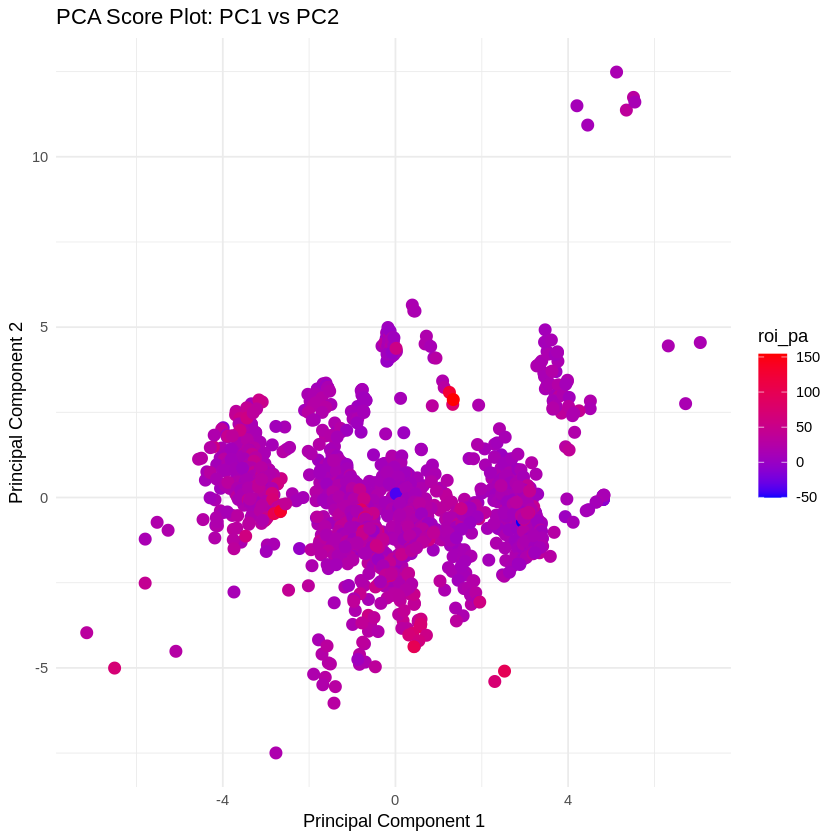

In [ ]:
# Load necessary libraries
library(ggplot2)

# Create a data frame with PCA scores and your response variable
pca_scores <- data.frame(PC1 = pca_result$x[, 1],
                         PC2 = pca_result$x[, 2],
                         roi_pa = response_variable)  # or any other grouping variable

# Create the score plot using ggplot2
ggplot(pca_scores, aes(x = PC1, y = PC2, color = roi_pa)) +
  geom_point(size = 3) +
  labs(title = "PCA Score Plot: PC1 vs PC2",
       x = "Principal Component 1",
       y = "Principal Component 2") +
  scale_color_gradient(low = "blue", high = "red") +
  theme_minimal()

# Regression Time!

Baseline

In [ ]:
base_average_model <- mean(train_data$roi_pa)
mae_base_average_model <- mae_calc(base_average_model, test_data$roi_pa)
rmse_base_average_model <- rmse_calc(base_average_model, test_data$roi_pa)
mse_base_average_model <- mse_calc(base_average_model, test_data$roi_pa)

Basic linear

In [ ]:
basic_linear_model <- lm(roi_pa ~ theme + subtheme + themeGroup + pieces + minifigs + availability + time_available + time_since_available + min_retail_price, data=train_data)
summary(basic_linear_model)
predictions_basic_linear_model <- predict(basic_linear_model, test_data)
mae_basic_linear_model <- mae_calc(predictions_basic_linear_model, test_data$roi_pa)
rmse_basic_linear_model <- rmse_calc(predictions_basic_linear_model, test_data$roi_pa)
mse_basic_linear_model <- mse_calc(predictions_basic_linear_model, test_data$roi_pa)


Call:
lm(formula = roi_pa ~ theme + subtheme + themeGroup + pieces + 
    minifigs + availability + time_available + time_since_available + 
    min_retail_price, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.099  -5.119   0.000   4.234  55.387 

Coefficients: (23 not defined because of singularities)
                                             Estimate Std. Error t value
(Intercept)                                 28.383555  16.388237   1.732
themeClassic                                -3.867005  17.484827  -0.221
themeCreator                                 4.778711  15.947298   0.300
themeCreator Expert                         11.414965  17.257332   0.661
themeDC Comics Super Heroes                  1.189641   8.616637   0.138
themeDimensions                              8.127369  16.427653   0.495
themeDisney                                -19.644188  14.490737  -1.356
themeDuplo                                  -3.092177   8.727470  -0.354
themeFrie

Warning message in predict.lm(basic_linear_model, test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


Good linear

In [ ]:
good_linear_model <- lm(roi_pa ~ theme + subtheme + themeGroup + pieces*time_since_available*min_retail_price + minifigs + time_available + availability, data = train_data)
# summary(good_linear_model)
predictions_good_linear_model <- predict(good_linear_model, test_data)
mae_good_linear_model <- mae_calc(predictions_good_linear_model, test_data$roi_pa)
rmse_good_linear_model <- rmse_calc(predictions_good_linear_model, test_data$roi_pa)
mse_good_linear_model <- mse_calc(predictions_good_linear_model, test_data$roi_pa)

Warning message in predict.lm(good_linear_model, test_data):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


Testing

In [ ]:
best_linear_model <- lm(roi_pa ~ log(min_retail_price) + theme + time_since_available*pieces + availability + time_available, data=train_data)
predictions_best_linear_model <- predict(best_linear_model, test_data)

mae_best_linear_model <- mae_calc(predictions_best_linear_model, test_data$roi_pa)
rmse_best_linear_model <- rmse_calc(predictions_best_linear_model, test_data$roi_pa)
mse_best_linear_model <- mse_calc(predictions_best_linear_model, test_data$roi_pa)


# Trees

Wrangling

In [ ]:
tree_train_data <- train_data
tree_test_data <- test_data

tree_train_data$time_since_available_x_retail_price <- tree_train_data$time_since_available * tree_train_data$min_retail_price
tree_test_data$time_since_available_x_retail_price <- tree_test_data$time_since_available * tree_test_data$min_retail_price

tree_train_data$time_since_available_x_pieces <- tree_train_data$time_since_available * tree_train_data$pieces
tree_test_data$time_since_available_x_pieces <- tree_test_data$time_since_available * tree_test_data$pieces

tree_train_data$pieces_x_retail_price <- tree_train_data$pieces * tree_train_data$min_retail_price
tree_test_data$pieces_x_retail_price <- tree_test_data$pieces * tree_test_data$min_retail_price

tree_train_data$pieces_x_retail_price_x_time_since_available <- tree_train_data$pieces * tree_train_data$min_retail_price *tree_train_data$time_since_available
tree_test_data$pieces_x_retail_price_x_time_since_available <- tree_test_data$pieces * tree_test_data$min_retail_price * tree_test_data$time_since_available

Regression tree

n= 882 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 882 170526.0000 19.886440  
   2) theme=City,Classic,Creator,DC Comics Super Heroes,Dimensions,Disney,Duplo,Friends,Juniors,Legends of Chima,Nexo Knights,Super Mario,The LEGO Movie,The LEGO Movie 2,Vidiyo 501  57589.9300 14.931120  
     4) last_available_int< 2021.97 403  32710.4100 13.567500  
       8) theme=Classic,Friends,Legends of Chima,The LEGO Movie 2 110   7409.8560  9.814282 *
       9) theme=City,Creator,DC Comics Super Heroes,Dimensions,Disney,Duplo,Juniors,Nexo Knights,Super Mario,The LEGO Movie 293  23169.2800 14.976560 *
     5) last_available_int>=2021.97 98  21048.6200 20.538640  
      10) title_pos>=0.400957 9   1927.6830  3.759802 *
      11) title_pos< 0.400957 89  16330.9600 22.235370  
        22) theme=City,Creator,Friends,Super Mario,The LEGO Movie 2 75  10006.8800 20.130190 *
        23) theme=DC Comics Super Heroes,Disney,Duplo 14   4211.0640 33.513110 *
   3) theme=Creator Expe

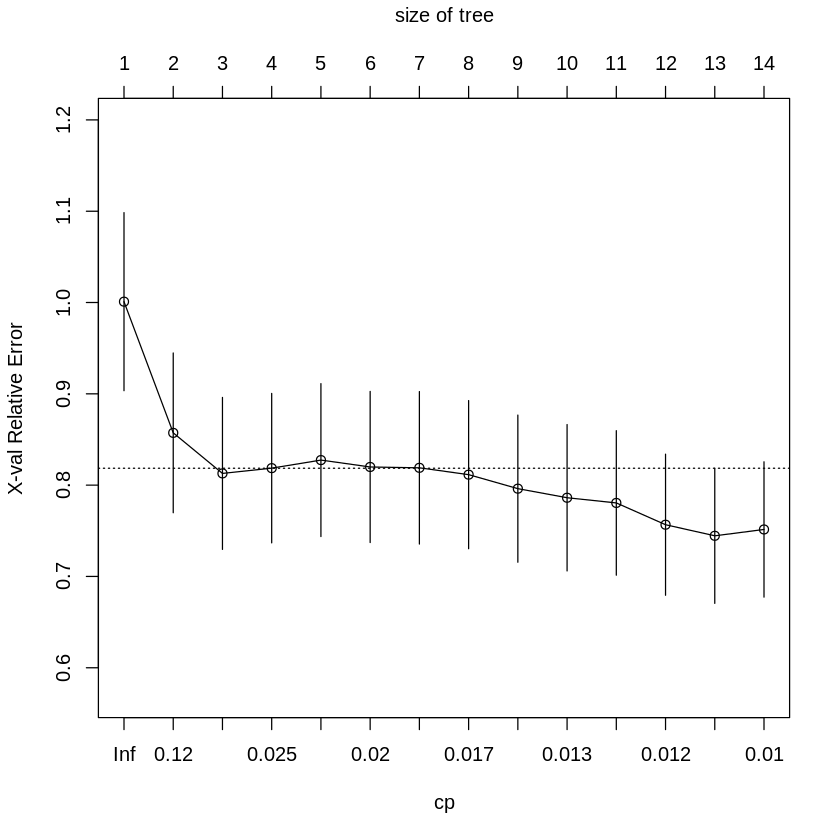

[1] 7.685113

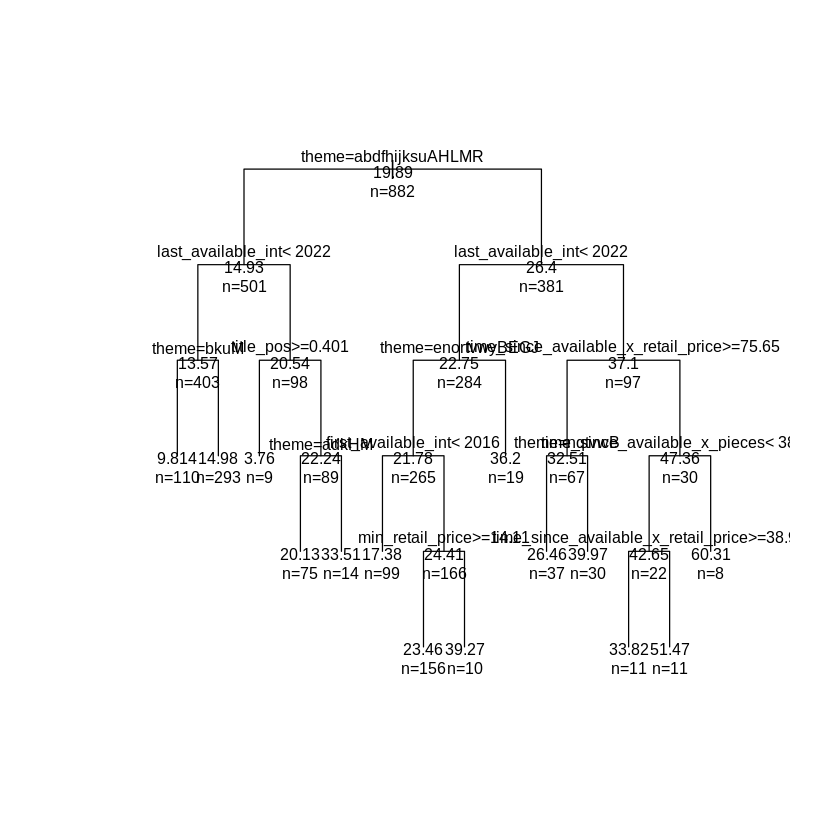

In [ ]:
regression_tree <- rpart(roi_pa~. -number -mean_nzd_new -subtheme, data = tree_train_data, method = "anova")

plotcp(regression_tree)
prune(regression_tree, cp=0.01)

predictions_regression_tree <- predict(regression_tree, tree_test_data)
mae_regression_tree <- mae_calc(predictions_regression_tree, tree_test_data$roi_pa)
rmse_regression_tree <- rmse_calc(predictions_regression_tree, tree_test_data$roi_pa)
mse_regression_tree <- mse_calc(predictions_regression_tree, tree_test_data$roi_pa)

plot(regression_tree, uniform = TRUE, margin = 0.1)
text(regression_tree, use.n = TRUE, all = TRUE, cex = 0.8)
mae_regression_tree

Generalised boosting tree

In [ ]:
boosting_tree <- gbm(roi_pa~. -number -subtheme -mean_nzd_new -first_available_int -last_available_int -themeGroup -num_reviews,data = tree_train_data,distribution="gaussian", n.trees=200,interaction.depth=7,shrinkage=0.025,n.minobsinnode=25)
predictions_boosting_tree <- predict(boosting_tree, tree_test_data)
mae_boosting_tree <- mae_calc(predictions_boosting_tree, tree_test_data$roi_pa)
rmse_boosting_tree <- rmse_calc(predictions_boosting_tree, tree_test_data$roi_pa)
mse_boosting_tree <- mse_calc(predictions_boosting_tree, tree_test_data$roi_pa)

Using 200 trees...




,var,rel.inf
,<chr>,<dbl>
theme,theme,45.65615183
time_since_available,time_since_available,21.76909590
time_since_available_x_retail_price,time_since_available_x_retail_price,12.56383302
time_available,time_available,5.63285899
min_retail_price,min_retail_price,3.87962738
time_since_available_x_pieces,time_since_available_x_pieces,3.07476796
pieces,pieces,2.36217725
pieces_x_retail_price_x_time_since_available,pieces_x_retail_price_x_time_since_available,1.81547539
pieces_x_retail_price,pieces_x_retail_price,1.42194702


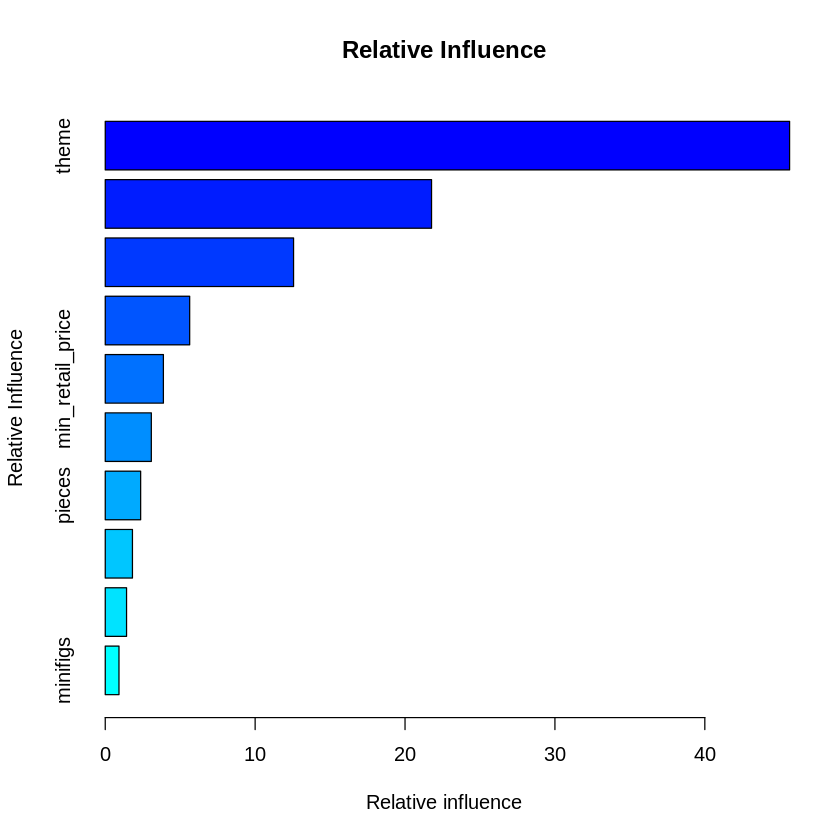

In [ ]:
# Subset the most important variables
summary(boosting_tree, main = "Relative Influence", ylab = "Relative Influence", cBars = 10)  # Only shows the top 10 important variables

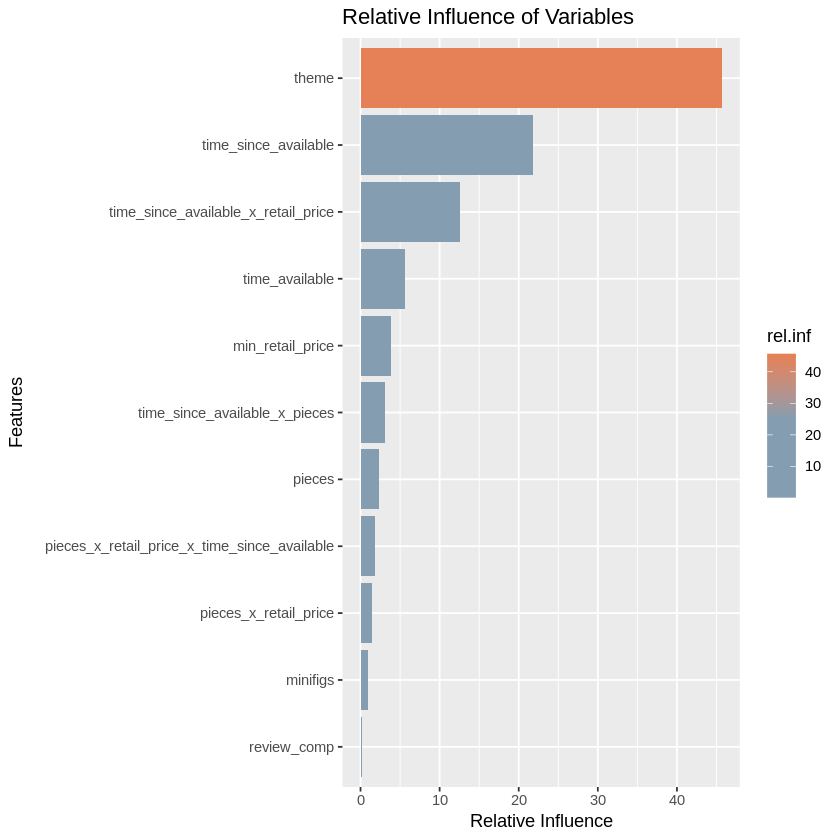

In [ ]:
# Extract relative influence
rel_inf <- summary(boosting_tree, plotit = FALSE)
rel_inf <- head(rel_inf[order(-rel_inf$rel.inf), ], 11)

# Using ggplot2 for more customization
ggplot(rel_inf, aes(x = reorder(var, rel.inf), y = rel.inf, fill = rel.inf)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Relative Influence of Variables", x = "Features", y = "Relative Influence") +
  scale_fill_gradient2(low = "#849db1", mid = "#849db1", high = "#f47942",
                       midpoint = 25)  # Adjust the midpoint


# Results

In [ ]:
error_table <- data.frame('Model' = character(), 'MAE' = numeric(), 'RMSE' = numeric(), 'MAE' = numeric(), stringsAsFactors = FALSE)
error_table <- rbind(error_table, data.frame(model = 'Base Average Guessing', MAE = mae_base_average_model, RMSE = rmse_base_average_model, MSE = mse_base_average_model))
error_table <- rbind(error_table, data.frame(model = 'Basic Linear Model', MAE = mae_basic_linear_model, RMSE = rmse_basic_linear_model, MSE = mse_basic_linear_model))
error_table <- rbind(error_table, data.frame(model = 'Good Linear Model', MAE = mae_good_linear_model, RMSE = rmse_good_linear_model, MSE = mse_good_linear_model))
error_table <- rbind(error_table, data.frame(model = 'Best Linear Model', MAE = mae_best_linear_model, RMSE = rmse_best_linear_model, MSE = mse_best_linear_model))
error_table <- rbind(error_table, data.frame(model = 'Regression Tree', MAE = mae_regression_tree, RMSE = rmse_regression_tree, MSE = mse_regression_tree))
error_table <- rbind(error_table, data.frame(model = 'Boosting Tree', MAE = mae_boosting_tree, RMSE = rmse_boosting_tree, MSE = mse_boosting_tree))
error_table <- rbind(error_table, data.frame(model = 'PCA Model', MAE = mae_pca_model, RMSE = rmse_pca_model, MSE = mse_pca_model))

error_table_sorted <- error_table[order(-error_table$MAE), ]
print(error_table_sorted)

                  model      MAE     RMSE      MSE
7             PCA Model 9.838118 13.63025 185.7838
1 Base Average Guessing 9.446398 13.36401 178.5968
2    Basic Linear Model 7.790133 10.91627 119.1649
5       Regression Tree 7.685113 11.18947 125.2043
3     Good Linear Model 7.582807 10.62727 112.9388
4     Best Linear Model 7.558828 11.01670 121.3677
6         Boosting Tree 7.144335 10.44174 109.0300


# Future predictions

In [ ]:
tree_train_data$time_since_available_x_retail_price <- tree_train_data$time_since_available * tree_train_data$min_retail_price
tree_test_data$time_since_available_x_retail_price <- tree_test_data$time_since_available * tree_test_data$min_retail_price

tree_train_data$time_since_available_x_pieces <- tree_train_data$time_since_available * tree_train_data$pieces
tree_test_data$time_since_available_x_pieces <- tree_test_data$time_since_available * tree_test_data$pieces

tree_train_data$pieces_x_retail_price <- tree_train_data$pieces * tree_train_data$min_retail_price
tree_test_data$pieces_x_retail_price <- tree_test_data$pieces * tree_test_data$min_retail_price

tree_train_data$pieces_x_retail_price_x_time_since_available <- tree_train_data$pieces * tree_train_data$min_retail_price *tree_train_data$time_since_available
tree_test_data$pieces_x_retail_price_x_time_since_available <- tree_test_data$pieces * tree_test_data$min_retail_price * tree_test_data$time_since_available

In [ ]:
future_data <- read.csv("sets_retiring_soon_new (1).csv")
future_data$pieces <- future_data$pieces_count
future_data$time_available <- future_data$time_available_int
future_data$pieces_x_retail_price <- future_data$pieces * future_data$min_retail_price
summary(future_data)

 availability         currency              ean                name          
 Length:362         Length:362         Min.   :5.702e+12   Length:362        
 Class :character   Class :character   1st Qu.:5.702e+12   Class :character  
 Mode  :character   Mode  :character   Median :5.702e+12   Mode  :character  
                                       Mean   :5.702e+12                     
                                       3rd Qu.:5.702e+12                     
                                       Max.   :5.702e+12                     
                                                                             
  pieces_count    released_date      retail_price_au   retail_price_ca  
 Min.   :  24.0   Length:362         Min.   :  14.99   Min.   :  12.99  
 1st Qu.: 203.2   Class :character   1st Qu.:  32.99   1st Qu.:  24.99  
 Median : 387.5   Mode  :character   Median :  69.99   Median :  59.99  
 Mean   : 679.0                      Mean   : 110.00   Mean   :  91.23  
 3rd Qu.: 8

In [ ]:
future_data$theme <- factor(future_data$theme)
future_data$availability <- factor(future_data$availability)

In [ ]:
future_data$time_since_available <- 5
future_data$pieces_x_retail_price_x_time_since_available <- future_data$pieces * future_data$min_retail_price * future_data$time_since_available
future_data$time_since_available_x_pieces <- future_data$pieces * future_data$time_since_available
future_data$time_since_available_x_retail_price <- future_data$min_retail_price * future_data$time_since_available

In [ ]:
future_predictions_5 <- predict(boosting_tree, future_data)
future_data$yr5_pred <- future_predictions_5

Using 200 trees...


Warning message in predict.gbm(boosting_tree, future_data):
“NAs introduced by coercion”


In [ ]:
write.csv(future_data, "predictions_data.csv", row.names = FALSE)

In [ ]:
future_data_sorted <- future_data[order(-future_data$yr5_pred), ]
df_subset <- future_data_sorted[, c("name", "theme", "set_number", "min_retail_price", "yr5_pred")]
head(df_subset, 6)
tail(df_subset, 5)

,name,theme,set_number,min_retail_price,yr5_pred
,<chr>,<fct>,<chr>,<dbl>,<dbl>
42,Lotus Evija,Speed Champions,76907-1,32.92323,37.58280
47,Lamborghini Countach,Speed Champions,76908-1,32.92323,37.58280
315,1970 Ferrari 512 M,Speed Champions,76906-1,32.92323,37.40244
165,Pagani Utopia,Speed Champions,76915-1,35.96591,36.57252
190,Ferrari 812 Competizione,Speed Champions,76914-1,35.96591,36.57252
112,Porsche 963,Speed Champions,76916-1,35.96591,36.53255


,name,theme,set_number,min_retail_price,yr5_pred
,<chr>,<fct>,<chr>,<dbl>,<dbl>
163,Farm Animal Hospital,Friends,42632-1,47.95854,7.762043
49,Riding School,Friends,41746-1,47.95854,7.753714
356,Hot Dog Truck,Friends,42633-1,29.96959,7.215751
197,Space Research Rover,Friends,42602-1,77.94012,7.208421
222,Friends Advent Calendar 2024,Friends,42637-1,43.04144,4.998261
